In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os
import random
import shutil
from shutil import copyfile


2022-12-02 09:22:33.733363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
MAIN_DIR = '/Volumes/RAKSHA/Ghostnetbusters/Images'
NET_DIR = os.path.join(MAIN_DIR, 'Net')
NONET_DIR = os.path.join(MAIN_DIR, 'NoNet')

#remove all hidden files
!rm /Volumes/RAKSHA/Ghostnetbusters/Images/Net/._*.png
!rm /Volumes/RAKSHA/Ghostnetbusters/Images/NoNet/._*.png

print(f"There are {len(os.listdir(NET_DIR))} images in {os.listdir(NET_DIR)}")
print(f"There are {len(os.listdir(NONET_DIR))} images in {os.listdir(NONET_DIR)}")

There are 11 images in ['20200418-02_Sassnitz_Wissower_Klinken-MARK0005_1.png', '20200418-03_Sassnitz_Kolliger_Ort-MARK0004_1.png', '20200418-03_Sassnitz_Kolliger_Ort-MARK0005_1.png', '20200418-03_Sassnitz_Kolliger_Ort-MARK0007_1.png', '20200418-04_Kolliger_Ort_Sassnitz-MARK0005_1.png', '20200420-01_Steinkante_Königsstuhl-MARK0000_1.png', '20200420-01_Steinkante_Königsstuhl-MARK0003_1.png', '20200420-01_Steinkante_Königsstuhl-MARK0011_1.png', '20200420-02_Steinkante_Königsstuhl-MARK0000_1.png', '20200815-03_Sassnitz_-_Ranzow-MARK0002_1.png', '20200815-03_Sassnitz_-_Ranzow-MARK0003_1.png']
There are 16 images in ['20200815-03_Sassnitz_-_Ranzow-MARK0022_0.png', '20200418-02_Sassnitz_Wissower_Klinken-MARK0001_0.png', '20200418-02_Sassnitz_Wissower_Klinken-MARK0002_0.png', '20200815-03_Sassnitz_-_Ranzow-MARK0029_0.png', '20200418-02_Sassnitz_Wissower_Klinken-MARK0004_0.png', '20200418-02_Sassnitz_Wissower_Klinken-MARK0009_0.png', '20200815-03_Sassnitz_-_Ranzow-MARK0032_0.png', '2020041

In [10]:
Net = np.array([os.listdir(NET_DIR)])
print(Net)

[['20200418-02_Sassnitz_Wissower_Klinken-MARK0005_1.png']]


In [6]:
DEST_DIR = '/Volumes/RAKSHA/Ghostnetbusters/CNN_Images'
SOURCE_DIR = '/Volumes/RAKSHA/Ghostnetbusters/Images'

#if os.path.exists(DEST_DIR):
#    shutil.rmtree(DEST_DIR)

for root, subdirs, dirs in os.walk(DEST_DIR, True):
    for subdir in subdirs:
        if'.' in subdir:
            subdirs.remove(subdir)


In [7]:
def create_dir(dest_dir):
    """ 
    creates a directory with training and 
    validation subdirectories for each Nets and No Nets in the *root*;

    ** Args:
    dest_dir = dir where images are in

    ** Returns:
    None
    """
    train_path = os.path.join(dest_dir, 'training')
    os.makedirs(train_path)
    val_path = os.path.join(dest_dir, 'validation')
    os.makedirs(val_path)
    train_path_net = os.path.join(train_path, 'Net')
    os.makedirs(train_path_net)
    train_path_nonet = os.path.join(train_path, 'NoNet')
    os.makedirs(train_path_nonet)
    val_path_net = os.path.join(val_path, 'Net')
    os.makedirs(val_path_net)
    val_path_nonet = os.path.join(val_path, 'NoNet')
    os.makedirs(val_path_nonet)


try:
    create_dir(dest_dir = DEST_DIR)
except FileExistsError:
    print('File already exists')

In [8]:
def copy_files(source_dir, training_dir, validation_dir, split_size):
    """ 
    copies files from Image *source_dir* to *training_dir*/*validation_dir* in *dest_dir* after shuffling.
    Splits dataset according to *split_size*

    ** Args:

    filelist: create filelist with whole paths, where:
                                                lambda x: joins paths of subdirs/images names (x) and rootdir (function)
                                                map(): applies the lambda function to all subdirs/images in rootdir (iterable)
    ** Returns: 
    None
    
    """

    filepaths = list(map(lambda x: os.path.join(os.path.abspath(source_dir), x), os.listdir(source_dir)))
    shuffle_trainpath = random.sample(filepaths, int(len(filepaths)*split_size))
    shuffle_valpath = [img for img in filepaths if not img in shuffle_trainpath]
    [copyfile(train_path, os.path.join(training_dir, train_img)) for train_path, train_img in zip(shuffle_trainpath, os.listdir(source_dir))]
    [copyfile(val_path, os.path.join(validation_dir, val_img)) for val_path, val_img in zip(shuffle_valpath, os.listdir(source_dir))]

    return None



In [9]:
SOURCE_NONET = os.path.join(SOURCE_DIR, 'NoNet/')
SOURCE_NET = os.path.join(SOURCE_DIR, 'Net/')

TRAINING_DIR = '/Volumes/RAKSHA/Ghostnetbusters/CNN_Images/training/'
VALIDATION_DIR = '/Volumes/RAKSHA/Ghostnetbusters/CNN_Images/validation/'

TRAINING_NONET = os.path.join(TRAINING_DIR, 'NoNet')
VALIDATION_NONET = os.path.join(VALIDATION_DIR, 'NoNet')

TRAINING_NET = os.path.join(TRAINING_DIR, 'Net/')
VALIDATION_NET = os.path.join(VALIDATION_DIR, 'Net/')

split_NoNet = copy_files(SOURCE_NONET, TRAINING_NONET, VALIDATION_NONET, 0.8)
split_Net = copy_files(SOURCE_NET, TRAINING_NET, VALIDATION_NET, 0.8)


In [10]:
def image_generator(
    training_dir, 
    validation_dir, 
    rescale, 
    rotation_range,
    width_shift_range, 
    height_shift_range,
    shear_range,
    zoom_range,
    horizontal_flip,
    fill_mode
    ):
    train_datagen = ImageDataGenerator(
        rescale=rescale,
        rotation_range=rotation_range,
        width_shift_range = width_shift_range,
        height_shift_range = height_shift_range,
        shear_range = shear_range,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip,
        fill_mode = fill_mode
        )

    val_datagen = ImageDataGenerator(rescale = rescale)

    training_generator = train_datagen.flow_from_directory(
        training_dir,
        batch_size = 1,
        target_size = (128,128),
        class_mode = 'binary'
        )

    validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        batch_size = 1,
        target_size = (28,28),
        class_mode = 'binary'
        )

    return training_generator, validation_generator

In [11]:
RESCALE = 1/255
ROTATION = 40
WIDTH_SHIFT = 0.3
HEIGHT_SHIFT = 0.3
SHEAR = 0.3
ZOOM = 0.2
H_FLIP = True
FILL = 'nearest'

train_generator, validation_generator = image_generator(
    TRAINING_DIR, 
    VALIDATION_DIR, 
    rescale=RESCALE,
    rotation_range=ROTATION,
    width_shift_range=WIDTH_SHIFT,
    height_shift_range=HEIGHT_SHIFT,
    shear_range=SHEAR,
    zoom_range=ZOOM,
    horizontal_flip=H_FLIP,
    fill_mode=FILL
    )

print(train_generator)

Found 20 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [15]:
def create_model():
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(7, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [16]:
model = create_model()

history = model.fit(
    train_generator,
    epochs = 10,
    verbose = 1,
    validation_data = validation_generator
)

Epoch 1/10
20/20 [==============================] - 1s 31ms/step - loss: 0.6942 - accuracy: 0.4611 - val_loss: 0.6863 - val_accuracy: 0.5714
Epoch 2/10
20/20 [==============================] - 0s 22ms/step - loss: 0.6895 - accuracy: 0.6000 - val_loss: 0.6840 - val_accuracy: 0.5714
Epoch 3/10
20/20 [==============================] - 0s 22ms/step - loss: 0.6872 - accuracy: 0.5903 - val_loss: 0.6835 - val_accuracy: 0.5714
Epoch 4/10
20/20 [==============================] - 0s 22ms/step - loss: 0.6849 - accuracy: 0.5986 - val_loss: 0.6819 - val_accuracy: 0.5714
Epoch 5/10
20/20 [==============================] - 0s 22ms/step - loss: 0.6838 - accuracy: 0.6000 - val_loss: 0.6812 - val_accuracy: 0.5714
Epoch 6/10
20/20 [==============================] - 0s 22ms/step - loss: 0.6797 - accuracy: 0.6000 - val_loss: 0.6817 - val_accuracy: 0.5714
Epoch 7/10
20/20 [==============================] - 0s 22ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.6818 - val_accuracy: 0.5714
Epoch 8/10
20

To Do:
- test model with unseen image
- plot images
- sort more images to folders

(1, 28, 28, 3)
1/1 [==============================] - 0s 134ms/step


/var/folders/8v/0zy71xf95p54xmg6_k3khblx3c3zrw/T/ipykernel_7008/119852199.py:55: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


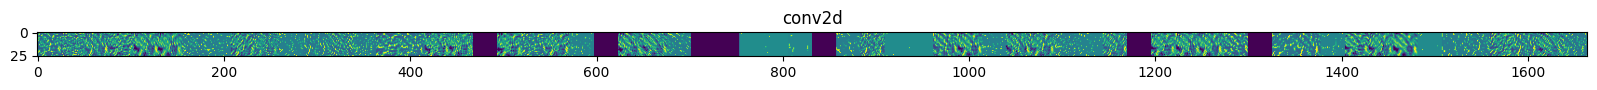

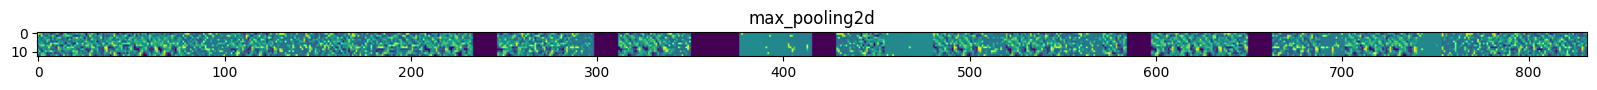

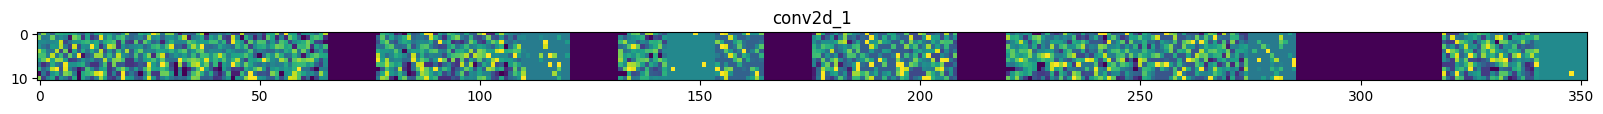

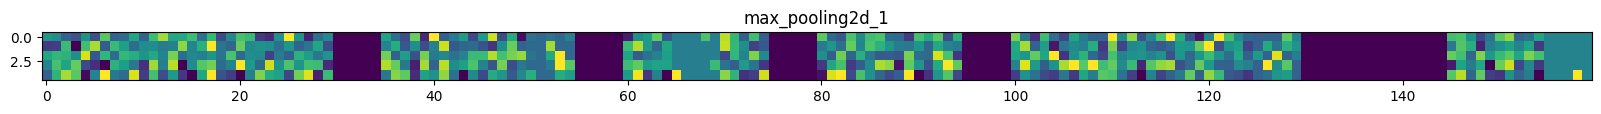

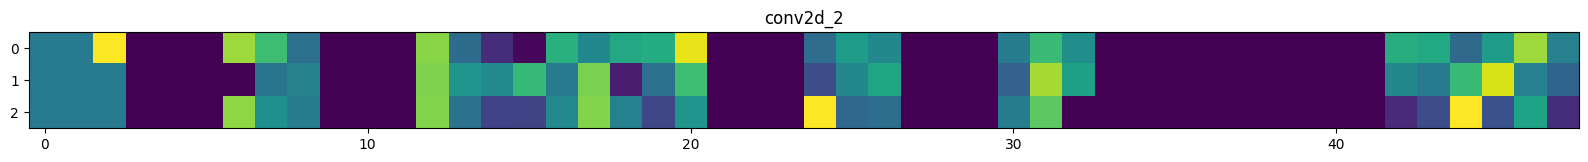

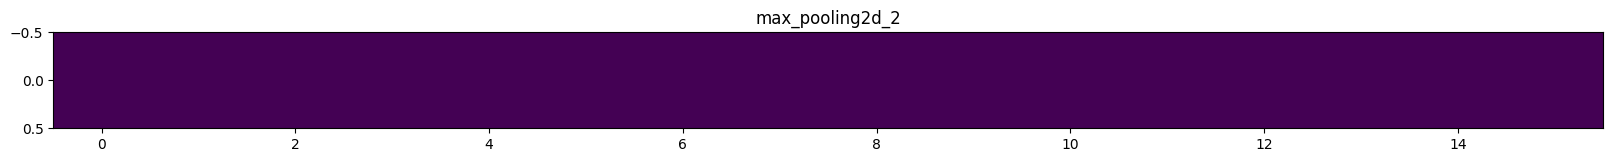

In [14]:
# Visualise steps


from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt


# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

train_net_fnames = os.listdir(TRAINING_NET)
train_nonet_fnames = os.listdir(TRAINING_NONET)

# Prepare a random input image from the training set.
net_img_files = [os.path.join(TRAINING_NET, f) for f in train_net_fnames]
nonet_img_files = [os.path.join(TRAINING_NONET, f) for f in train_nonet_fnames]
img_path = random.choice(net_img_files + nonet_img_files)
img = load_img(img_path, target_size=(28, 28))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)
print(x.shape)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 